In [1]:
from helper import *

In [2]:
data = pd.read_csv("data.csv")
print(data.shape)

(5572, 7480)


In [3]:
print(data.columns)

Index(['class', 'text', 'No_of_Characters', 'No_of_Words', 'No_of_sentence',
       'text_clean', 'y', '00', '000', '000pes',
       ...
       'ìï', 'ó_', 'û_thanks', 'ûªm', 'ûªt', 'ûªve', 'ûï', 'ûïharry', 'ûò',
       'ûówell'],
      dtype='object', length=7480)


In [4]:
y = data["y"]
X = data.drop(columns=['class', 'text', 'No_of_Characters', 'No_of_Words', 'No_of_sentence', 'text_clean' ,'y'])
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SPLIT, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5572, 7473) (5572,)
(4457, 7473) (4457,)
(1115, 7473) (1115,)


In [5]:
def make_model(
                name,
                regularization,
                solver,
                C
            ):
    model = LogisticRegression(
        penalty=regularization,
        solver=solver,
        C=C,
        max_iter=1000,
        random_state=42,
        verbose=1
    )
    return model

param_grid = {
    'regularization' : ["l2"],
    'solver': ['lbfgs'],
    'C' :[10e-3,10e-2,10e-1,0.5,10e0,10e1,10e2,10e3,10e4]
}

def train_f(model:LogisticRegression,X_train,y):
    model = model.fit(X_train,y)
    history = []
    return model , history 

r = grid_search(param_grid, make_model, X_train, y_train , X_test , y_test, train_f )

Grid size: 9


c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Model: Model0
Parameters: {'regularization': 'l2', 'solver': 'lbfgs', 'C': 0.01, 'name': 'Model0'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]], dtype=int64), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': 0.5, 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model1
Parameters: {'regularization': 'l2', 'solver': 'lbfgs', 'C': 0.1, 'name': 'Model1'}
Metrics: {'confusion_matrix': array([[965,   0],
       [149,   1]], dtype=int64), 'classification_report': {'0': {'precision': 0.8662477558348295, 'recall'

In [6]:
from pprint import pprint

r.sort(key=lambda x: x[2]["classification_report"]["weighted avg"]['f1-score'], reverse=True)
pprint([ (params , metrics["classification_report"]["weighted avg"]['f1-score']) for model, params, metrics in r])

[({'C': 100000.0, 'name': 'Model8', 'regularization': 'l2', 'solver': 'lbfgs'},
  0.9789740241690607),
 ({'C': 1000.0, 'name': 'Model6', 'regularization': 'l2', 'solver': 'lbfgs'},
  0.9780260153952233),
 ({'C': 10000.0, 'name': 'Model7', 'regularization': 'l2', 'solver': 'lbfgs'},
  0.9780260153952233),
 ({'C': 100.0, 'name': 'Model5', 'regularization': 'l2', 'solver': 'lbfgs'},
  0.9723597819619624),
 ({'C': 10.0, 'name': 'Model4', 'regularization': 'l2', 'solver': 'lbfgs'},
  0.9722712265313164),
 ({'C': 1.0, 'name': 'Model2', 'regularization': 'l2', 'solver': 'lbfgs'},
  0.9445218963264854),
 ({'C': 0.5, 'name': 'Model3', 'regularization': 'l2', 'solver': 'lbfgs'},
  0.909561236554289),
 ({'C': 0.1, 'name': 'Model1', 'regularization': 'l2', 'solver': 'lbfgs'},
  0.8052252025168011),
 ({'C': 0.01, 'name': 'Model0', 'regularization': 'l2', 'solver': 'lbfgs'},
  0.8030570886512591)]


0.979372197309417
0.9789740241690607


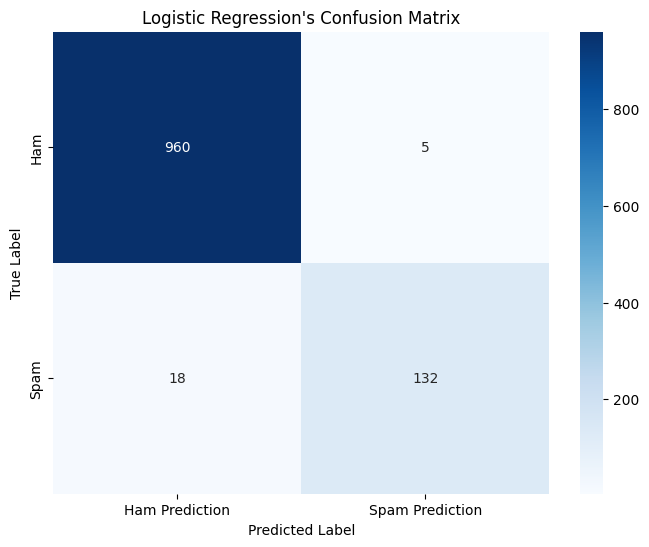

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

for model, params, metrics in r:
    cm =  metrics['confusion_matrix']
    print(metrics["classification_report"]['accuracy'])
    print(metrics["classification_report"]["weighted avg"]['f1-score'])
# Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham Prediction', 'Spam Prediction'], yticklabels=['Ham', 'Spam'])
    plt.title('Logistic Regression\'s Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    break

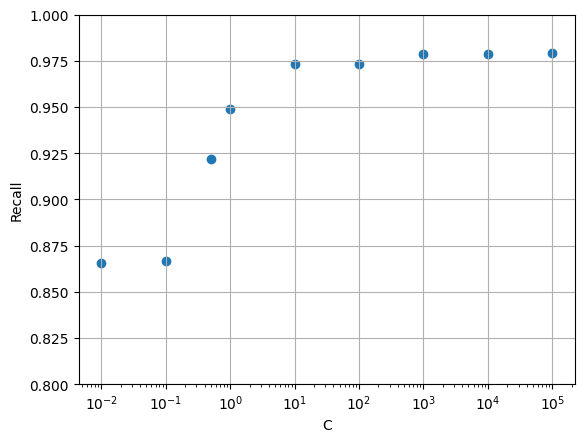

In [8]:
import matplotlib.pyplot as plt
points = [(param["C"], metrics["classification_report"]["accuracy"]) for _ , param , metrics in r]
plt.scatter(*zip(*points))
plt.xscale('log')
plt.xlabel('C')
plt.ylim([0.8,1])
plt.ylabel('Recall')
plt.grid()
plt.show()


In [9]:
from sklearn.ensemble import RandomForestClassifier

def make_model(
        name,
        max_depth,
        n_estimators,
        min_samples_split,
        class_weight
    ):
    model = RandomForestClassifier(
        max_depth=5, n_estimators=10, class_weight = "balanced",min_samples_split=5

    )
    return model

param_grid = {
    'max_depth' : [None],
    'n_estimators' : [100, 200, 300],
    'min_samples_split' : [5,10,20],
    'class_weight' : ["balanced"]
}

r2 = grid_search(param_grid, make_model, X_train, y_train , X_test , y_test, train_f )

Grid size: 9
Model: Model0
Parameters: {'max_depth': None, 'n_estimators': 100, 'min_samples_split': 5, 'class_weight': 'balanced', 'name': 'Model0'}
Metrics: {'confusion_matrix': array([[933,  32],
       [ 32, 118]], dtype=int64), 'classification_report': {'0': {'precision': 0.966839378238342, 'recall': 0.966839378238342, 'f1-score': 0.966839378238342, 'support': 965.0}, '1': {'precision': 0.7866666666666666, 'recall': 0.7866666666666666, 'f1-score': 0.7866666666666666, 'support': 150.0}, 'accuracy': 0.9426008968609866, 'macro avg': {'precision': 0.8767530224525043, 'recall': 0.8767530224525043, 'f1-score': 0.8767530224525043, 'support': 1115.0}, 'weighted avg': {'precision': 0.9426008968609866, 'recall': 0.9426008968609866, 'f1-score': 0.9426008968609866, 'support': 1115.0}}, 'roc_auc': 0.8767530224525043, 'fpr': array([0.        , 0.03316062, 1.        ]), 'tpr': array([0.        , 0.78666667, 1.        ]), 'history': []}
Model: Model1
Parameters: {'max_depth': None, 'n_estimators'

In [10]:
from pprint import pprint

r2.sort(key=lambda x: x[2]["classification_report"]["weighted avg"]["f1-score"], reverse=True)
pprint([ (params , metrics["classification_report"]["weighted avg"]["f1-score"]) for model, params, metrics in r2])

[({'class_weight': 'balanced',
   'max_depth': None,
   'min_samples_split': 20,
   'n_estimators': 100,
   'name': 'Model6'},
  0.9487273692555207),
 ({'class_weight': 'balanced',
   'max_depth': None,
   'min_samples_split': 10,
   'n_estimators': 300,
   'name': 'Model5'},
  0.9440915051499085),
 ({'class_weight': 'balanced',
   'max_depth': None,
   'min_samples_split': 5,
   'n_estimators': 100,
   'name': 'Model0'},
  0.9426008968609866),
 ({'class_weight': 'balanced',
   'max_depth': None,
   'min_samples_split': 5,
   'n_estimators': 300,
   'name': 'Model2'},
  0.94068180345752),
 ({'class_weight': 'balanced',
   'max_depth': None,
   'min_samples_split': 5,
   'n_estimators': 200,
   'name': 'Model1'},
  0.9356993837078249),
 ({'class_weight': 'balanced',
   'max_depth': None,
   'min_samples_split': 20,
   'n_estimators': 300,
   'name': 'Model8'},
  0.9346883006397578),
 ({'class_weight': 'balanced',
   'max_depth': None,
   'min_samples_split': 10,
   'n_estimators': 100,


0.9497757847533632
0.9487273692555207


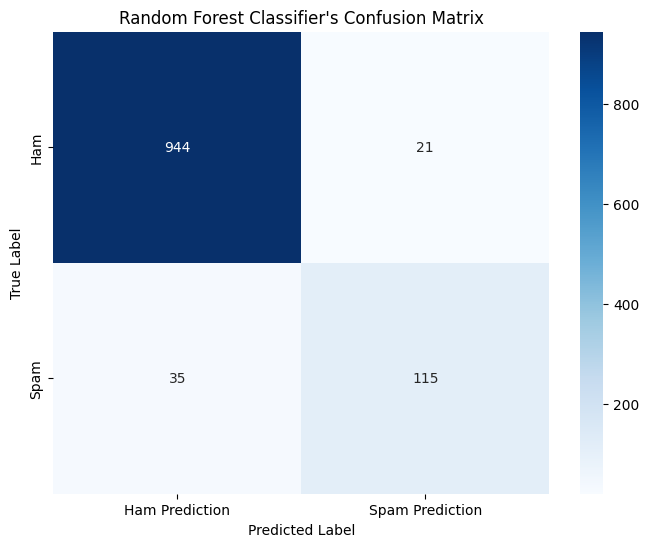

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

for model, params, metrics in r2:
    cm =  metrics['confusion_matrix']
    print(metrics["classification_report"]['accuracy'])
    print(metrics["classification_report"]["weighted avg"]['f1-score'])

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham Prediction', 'Spam Prediction'], yticklabels=['Ham', 'Spam'])
    plt.title('Random Forest Classifier\'s Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    break

In [12]:
from sklearn.ensemble import AdaBoostClassifier

def make_model(
        name,
        n_estimators,
    ):
    model = AdaBoostClassifier(
        n_estimators=10
    )
    return model

param_grid = {
    'n_estimators' : [10,20,30,50,100],
}

r3 = grid_search(param_grid, make_model, X_train, y_train , X_test , y_test, train_f )

Grid size: 5


c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: Model0
Parameters: {'n_estimators': 10, 'name': 'Model0'}
Metrics: {'confusion_matrix': array([[956,   9],
       [ 62,  88]], dtype=int64), 'classification_report': {'0': {'precision': 0.9390962671905697, 'recall': 0.9906735751295337, 'f1-score': 0.9641956631366616, 'support': 965.0}, '1': {'precision': 0.9072164948453608, 'recall': 0.5866666666666667, 'f1-score': 0.7125506072874493, 'support': 150.0}, 'accuracy': 0.9363228699551569, 'macro avg': {'precision': 0.9231563810179653, 'recall': 0.7886701208981002, 'f1-score': 0.8383731352120555, 'support': 1115.0}, 'weighted avg': {'precision': 0.9348075085791065, 'recall': 0.9363228699551569, 'f1-score': 0.9303420681793684, 'support': 1115.0}}, 'roc_auc': 0.7886701208981002, 'fpr': array([0.        , 0.00932642, 1.        ]), 'tpr': array([0.        , 0.58666667, 1.        ]), 'history': []}


c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: Model1
Parameters: {'n_estimators': 20, 'name': 'Model1'}
Metrics: {'confusion_matrix': array([[956,   9],
       [ 62,  88]], dtype=int64), 'classification_report': {'0': {'precision': 0.9390962671905697, 'recall': 0.9906735751295337, 'f1-score': 0.9641956631366616, 'support': 965.0}, '1': {'precision': 0.9072164948453608, 'recall': 0.5866666666666667, 'f1-score': 0.7125506072874493, 'support': 150.0}, 'accuracy': 0.9363228699551569, 'macro avg': {'precision': 0.9231563810179653, 'recall': 0.7886701208981002, 'f1-score': 0.8383731352120555, 'support': 1115.0}, 'weighted avg': {'precision': 0.9348075085791065, 'recall': 0.9363228699551569, 'f1-score': 0.9303420681793684, 'support': 1115.0}}, 'roc_auc': 0.7886701208981002, 'fpr': array([0.        , 0.00932642, 1.        ]), 'tpr': array([0.        , 0.58666667, 1.        ]), 'history': []}


c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: Model2
Parameters: {'n_estimators': 30, 'name': 'Model2'}
Metrics: {'confusion_matrix': array([[956,   9],
       [ 62,  88]], dtype=int64), 'classification_report': {'0': {'precision': 0.9390962671905697, 'recall': 0.9906735751295337, 'f1-score': 0.9641956631366616, 'support': 965.0}, '1': {'precision': 0.9072164948453608, 'recall': 0.5866666666666667, 'f1-score': 0.7125506072874493, 'support': 150.0}, 'accuracy': 0.9363228699551569, 'macro avg': {'precision': 0.9231563810179653, 'recall': 0.7886701208981002, 'f1-score': 0.8383731352120555, 'support': 1115.0}, 'weighted avg': {'precision': 0.9348075085791065, 'recall': 0.9363228699551569, 'f1-score': 0.9303420681793684, 'support': 1115.0}}, 'roc_auc': 0.7886701208981002, 'fpr': array([0.        , 0.00932642, 1.        ]), 'tpr': array([0.        , 0.58666667, 1.        ]), 'history': []}


c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: Model3
Parameters: {'n_estimators': 50, 'name': 'Model3'}
Metrics: {'confusion_matrix': array([[956,   9],
       [ 62,  88]], dtype=int64), 'classification_report': {'0': {'precision': 0.9390962671905697, 'recall': 0.9906735751295337, 'f1-score': 0.9641956631366616, 'support': 965.0}, '1': {'precision': 0.9072164948453608, 'recall': 0.5866666666666667, 'f1-score': 0.7125506072874493, 'support': 150.0}, 'accuracy': 0.9363228699551569, 'macro avg': {'precision': 0.9231563810179653, 'recall': 0.7886701208981002, 'f1-score': 0.8383731352120555, 'support': 1115.0}, 'weighted avg': {'precision': 0.9348075085791065, 'recall': 0.9363228699551569, 'f1-score': 0.9303420681793684, 'support': 1115.0}}, 'roc_auc': 0.7886701208981002, 'fpr': array([0.        , 0.00932642, 1.        ]), 'tpr': array([0.        , 0.58666667, 1.        ]), 'history': []}


c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: Model4
Parameters: {'n_estimators': 100, 'name': 'Model4'}
Metrics: {'confusion_matrix': array([[956,   9],
       [ 62,  88]], dtype=int64), 'classification_report': {'0': {'precision': 0.9390962671905697, 'recall': 0.9906735751295337, 'f1-score': 0.9641956631366616, 'support': 965.0}, '1': {'precision': 0.9072164948453608, 'recall': 0.5866666666666667, 'f1-score': 0.7125506072874493, 'support': 150.0}, 'accuracy': 0.9363228699551569, 'macro avg': {'precision': 0.9231563810179653, 'recall': 0.7886701208981002, 'f1-score': 0.8383731352120555, 'support': 1115.0}, 'weighted avg': {'precision': 0.9348075085791065, 'recall': 0.9363228699551569, 'f1-score': 0.9303420681793684, 'support': 1115.0}}, 'roc_auc': 0.7886701208981002, 'fpr': array([0.        , 0.00932642, 1.        ]), 'tpr': array([0.        , 0.58666667, 1.        ]), 'history': []}


In [13]:
from pprint import pprint

r3.sort(key=lambda x: x[2]["classification_report"]["weighted avg"]["f1-score"], reverse=True)
pprint([ (params , metrics["classification_report"]["weighted avg"]["f1-score"]) for model, params, metrics in r3])

[({'n_estimators': 10, 'name': 'Model0'}, 0.9303420681793684),
 ({'n_estimators': 20, 'name': 'Model1'}, 0.9303420681793684),
 ({'n_estimators': 30, 'name': 'Model2'}, 0.9303420681793684),
 ({'n_estimators': 50, 'name': 'Model3'}, 0.9303420681793684),
 ({'n_estimators': 100, 'name': 'Model4'}, 0.9303420681793684)]


0.9363228699551569
0.9303420681793684


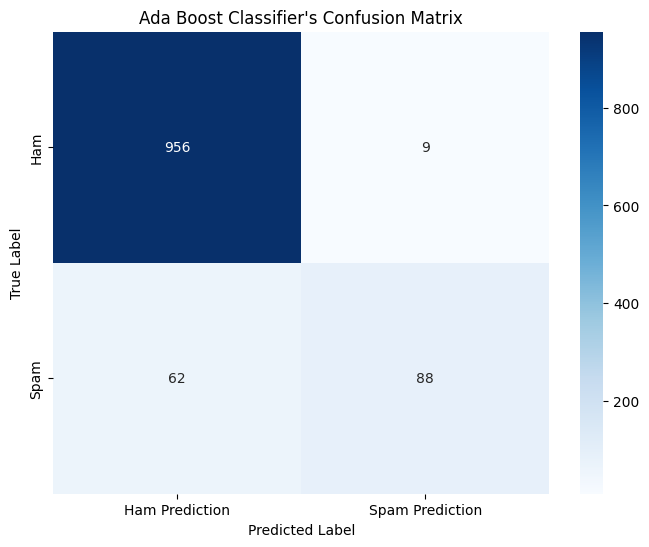

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

for model, params, metrics in r3:
    cm =  metrics['confusion_matrix']
    print(metrics["classification_report"]['accuracy'])
    print(metrics["classification_report"]["weighted avg"]['f1-score'])

# Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham Prediction', 'Spam Prediction'], yticklabels=['Ham', 'Spam'])
    plt.title('Ada Boost Classifier\'s Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    break

In [15]:
from sklearn.tree import DecisionTreeClassifier

def make_model(
        name,
        max_depth,
    ):
    model = DecisionTreeClassifier(
        max_depth=max_depth
    )
    return model

param_grid = {
    'max_depth' : [10,20,30,50],
}

r4 = grid_search(param_grid, make_model, X_train, y_train , X_test , y_test, train_f )

Grid size: 4
Model: Model0
Parameters: {'max_depth': 10, 'name': 'Model0'}
Metrics: {'confusion_matrix': array([[962,   3],
       [ 44, 106]], dtype=int64), 'classification_report': {'0': {'precision': 0.9562624254473161, 'recall': 0.9968911917098445, 'f1-score': 0.976154236428209, 'support': 965.0}, '1': {'precision': 0.9724770642201835, 'recall': 0.7066666666666667, 'f1-score': 0.8185328185328186, 'support': 150.0}, 'accuracy': 0.957847533632287, 'macro avg': {'precision': 0.9643697448337498, 'recall': 0.8517789291882556, 'f1-score': 0.8973435274805137, 'support': 1115.0}, 'weighted avg': {'precision': 0.958443766986267, 'recall': 0.957847533632287, 'f1-score': 0.9549495613750174, 'support': 1115.0}}, 'roc_auc': 0.8517789291882555, 'fpr': array([0.        , 0.00310881, 1.        ]), 'tpr': array([0.        , 0.70666667, 1.        ]), 'history': []}
Model: Model1
Parameters: {'max_depth': 20, 'name': 'Model1'}
Metrics: {'confusion_matrix': array([[961,   4],
       [ 26, 124]], dtype

In [16]:
from pprint import pprint

r4.sort(key=lambda x: x[2]["classification_report"]["weighted avg"]["f1-score"], reverse=True)
pprint([ (params , metrics["classification_report"]["weighted avg"]["f1-score"]) for model, params, metrics in r4])

[({'max_depth': 50, 'name': 'Model3'}, 0.9761948500114916),
 ({'max_depth': 30, 'name': 'Model2'}, 0.9751631565813165),
 ({'max_depth': 20, 'name': 'Model1'}, 0.9721811722128582),
 ({'max_depth': 10, 'name': 'Model0'}, 0.9549495613750174)]


0.9766816143497757
0.9761948500114916


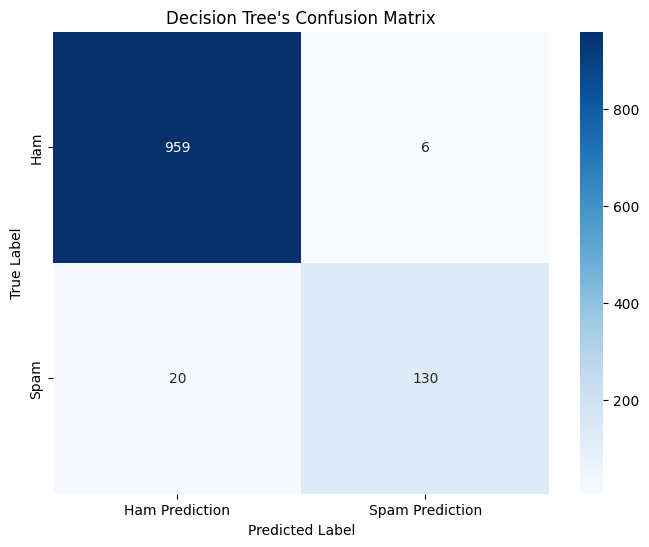

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

for model, params, metrics in r4:
    cm =  metrics['confusion_matrix']
    print(metrics["classification_report"]['accuracy'])
    print(metrics["classification_report"]["weighted avg"]['f1-score'])

# Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham Prediction', 'Spam Prediction'], yticklabels=['Ham', 'Spam'])
    plt.title('Decision Tree\'s Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    break

In [18]:
from sklearn.svm import SVC

def make_model(
        name,
        C,
        gamma,
        kernel
    ):
    model = SVC(
        C=C,
        gamma=gamma,
        kernel='linear'
    )
    return model

param_grid = {
    'C' : [0.1,10,100],
    'gamma' : ['scale'],
    'kernel': ['linear']
}

r5 = grid_search(param_grid, make_model, X_train, y_train , X_test , y_test, train_f )

Grid size: 3
Model: Model0
Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'name': 'Model0'}
Metrics: {'confusion_matrix': array([[962,   3],
       [ 83,  67]], dtype=int64), 'classification_report': {'0': {'precision': 0.9205741626794258, 'recall': 0.9968911917098445, 'f1-score': 0.9572139303482587, 'support': 965.0}, '1': {'precision': 0.9571428571428572, 'recall': 0.44666666666666666, 'f1-score': 0.6090909090909091, 'support': 150.0}, 'accuracy': 0.9228699551569507, 'macro avg': {'precision': 0.9388585099111415, 'recall': 0.7217789291882556, 'f1-score': 0.7831524197195839, 'support': 1115.0}, 'weighted avg': {'precision': 0.9254937179884076, 'recall': 0.9228699551569507, 'f1-score': 0.910381236905566, 'support': 1115.0}}, 'roc_auc': 0.7217789291882556, 'fpr': array([0.        , 0.00310881, 1.        ]), 'tpr': array([0.        , 0.44666667, 1.        ]), 'history': []}
Model: Model1
Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear', 'name': 'Model1'}
Metrics: 

In [19]:
from pprint import pprint

r5.sort(key=lambda x: x[2]["classification_report"]["weighted avg"]["f1-score"], reverse=True)
pprint([ (params , metrics["classification_report"]["weighted avg"]["f1-score"]) for model, params, metrics in r5])

[({'C': 10, 'gamma': 'scale', 'kernel': 'linear', 'name': 'Model1'},
  0.9732384999950913),
 ({'C': 100, 'gamma': 'scale', 'kernel': 'linear', 'name': 'Model2'},
  0.9732384999950913),
 ({'C': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'name': 'Model0'},
  0.910381236905566)]


0.9739910313901345
0.9732384999950913


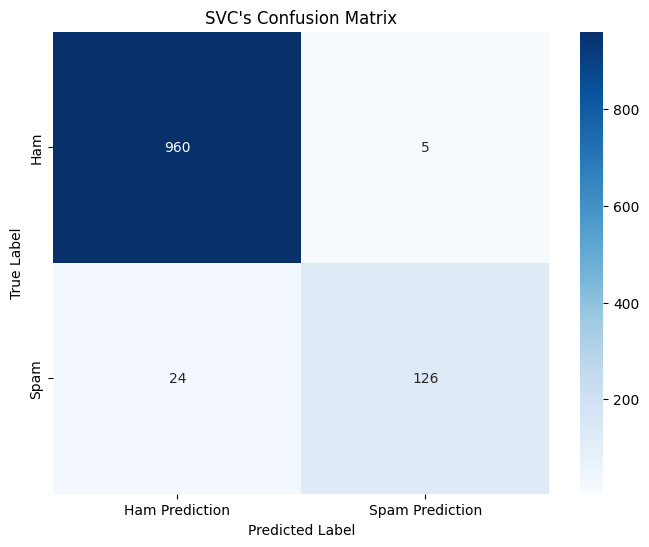

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for model, params, metrics in r5:
    cm =  metrics['confusion_matrix']
    print(metrics["classification_report"]['accuracy'])
    print(metrics["classification_report"]["weighted avg"]['f1-score'])

# Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham Prediction', 'Spam Prediction'], yticklabels=['Ham', 'Spam'])
    plt.title('SVC\'s Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    break

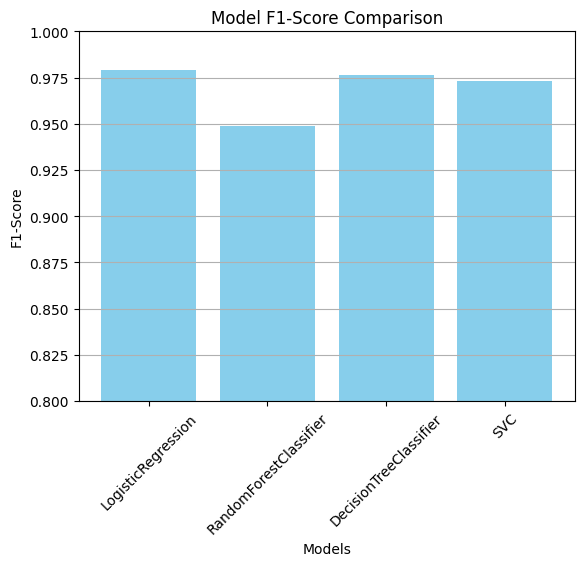

In [21]:
best_models = [
    r[0],
    r2[0],
    r4[0],
    r5[0],
]

import matplotlib.pyplot as plt

# Example data
models = [ str(type(m).__name__) for m , _ , _ in best_models]
accuracies = [ m["classification_report"]["weighted avg"]["f1-score"] for _ , _ , m in best_models]

plt.bar(models,accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('Model F1-Score Comparison')
plt.ylim([0.8, 1])
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

